# Data Cleaning and Analysis notebook

In this notebook I will prepare some data cleaning and plotting functions which could help us better understand the data

In [78]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
temp_df = pd.read_csv('data_temperature_cscs.csv')

temp_df.columns

display(temp_df.head())


,Unnamed: 0,_index,_id,_score,_source.MessageId,_source.Sensor.Location,_source.Sensor.Value,_source.Sensor.PhysicalContext,_source.Sensor.ParentalContext,_source.Sensor.Index,...,_source.Metadata.Kafka.Topic,_source.Metadata.Kafka.Offset,_source.Metadata.Kafka.Timestamp,_source.Metadata.Logstash.Timestamp,_source.@timestamp,_source.vcluster,_source.data_stream.namespace,_source.data_stream.type,_source.data_stream.dataset,_source.nid
0,0,.ds-metrics-facility.telemetry-alps.temperatur...,H45igJUBPiNEg2qPTQTy,1.0,CrayTelemetry.Temperature,x1304c7s4b0n0,39.000,VoltageRegulator,Chassis,0,...,cray-telemetry-temperature-split,103622394042,2025-03-10T13:59:00.237Z,2025-03-10T14:07:23.527442114Z,2025-03-10T13:58:56.750Z,daint,alps.temperature,metrics,facility.telemetry,6898
1,1,.ds-metrics-facility.telemetry-alps.temperatur...,II5igJUBPiNEg2qPTQTy,1.0,CrayTelemetry.Temperature,x1304c7s4b0n0,38.000,VoltageRegulator,Chassis,6,...,cray-telemetry-temperature-split,103622394043,2025-03-10T13:59:00.237Z,2025-03-10T14:07:23.527452244Z,2025-03-10T13:58:56.435Z,daint,alps.temperature,metrics,facility.telemetry,6898
2,2,.ds-metrics-facility.telemetry-alps.temperatur...,IY5igJUBPiNEg2qPTQTy,1.0,CrayTelemetry.Temperature,x1304c7s4b0n0,38.375,CPU,NaN,0,...,cray-telemetry-temperature-split,103622394044,2025-03-10T13:59:00.237Z,2025-03-10T14:07:23.527462294Z,2025-03-10T13:58:56.743Z,daint,alps.temperature,metrics,facility.telemetry,6898
3,3,.ds-metrics-facility.telemetry-alps.temperatur...,Io5igJUBPiNEg2qPTQTy,1.0,CrayTelemetry.Temperature,x1304c7s4b0n0,43.062,CPU,NaN,1,...,cray-telemetry-temperature-split,103622394045,2025-03-10T13:59:00.237Z,2025-03-10T14:07:23.527472224Z,2025-03-10T13:58:56.745Z,daint,alps.temperature,metrics,facility.telemetry,6898
4,4,.ds-metrics-facility.telemetry-alps.temperatur...,I45igJUBPiNEg2qPTQTy,1.0,CrayTelemetry.Temperature,x1304c7s4b0n0,43.812,CPU,NaN,2,...,cray-telemetry-temperature-split,103622394046,2025-03-10T13:59:00.237Z,2025-03-10T14:07:23.527485354Z,2025-03-10T13:58:56.742Z,daint,alps.temperature,metrics,facility.telemetry,6898


## Data cleaning functions

In [80]:
# define some lists of attributes which are always present in the datasets
# location informations
location_cols = ['_source.Sensor.Location',
                 '_source.Sensor.LocationDetail.Blade',
                 '_source.Sensor.LocationDetail.Cabinet',
                 '_source.Sensor.LocationDetail.Node',
                 '_source.Sensor.LocationDetail.Chassie',
                 '_source.Sensor.LocationDetail.Bmc',
                 '_source.Sensor.LocationDetail.XName']
# metadata informations
metadata_cols = ['_source.Metadata.Kafka.ConsumerGroup',
                 '_source.Metadata.Kafka.Partition',
                 '_source.Metadata.Kafka.Topic',
                 '_source.Metadata.Kafka.Offset',
                 '_source.Metadata.Kafka.Timestamp',
                 '_source.Metadata.Logstash.Timestamp']


In [81]:
def sort_by_timestamp(df):
    """
    Sort the dataframe by the _source.Sensor.Timestamp
    :param df: DataFrame to be sorted
    :return: sorted DataFrame
    """
    # sort the dataframe by the timestamp
    df = df.sort_values(by='_source.Sensor.Timestamp')
    # reset the index
    df = df.reset_index(drop=True)
    return df

#display(temp_df.head(10))
sorted_df = sort_by_timestamp(temp_df)
#display(sorted_df.head(10))

In [82]:
def prepare_df(df, cols_to_keep=None):
    """
    Prepares the DataFrame by dropping unnecessary columns and renaming others.
    """

    # copy the DataFrame to avoid modifying the original one
    df = df.copy()

    # Ensure the timestamp column is in datetime format
    df['_source.Sensor.Timestamp'] = pd.to_datetime(df['_source.Sensor.Timestamp'], errors='coerce')


    # keep only the relevant columns if specified
    if cols_to_keep is not None:
        df = df[cols_to_keep]#

    # for all columns which contain the string 'timestamp' transform in datetime
    for col in df.columns:
        if 'timestamp' in col:
            df[col] = pd.to_datetime(df[col].astype(str), errors='coerce')

    # sort the dataframe by timestamp of the sensor
    if cols_to_keep is None or '_source.Sensor.Timestamp' in cols_to_keep:
        sorted_df = sort_by_timestamp(df)
    else :
        sorted_df = df
    return sorted_df

# # test with the metadata columns
# temp_meta_df = prepare_df(temp_df, cols_to_keep=metadata_cols)
# display(temp_meta_df.head(5))
# # show the types of the columns
# temp_meta_df.dtypes

# # test with the location columns
# temp_location_df = prepare_df(temp_df, cols_to_keep=location_cols)
# display(temp_location_df.head(5))
# # show the types of the columns
# temp_location_df.dtypes


## Plotting functions


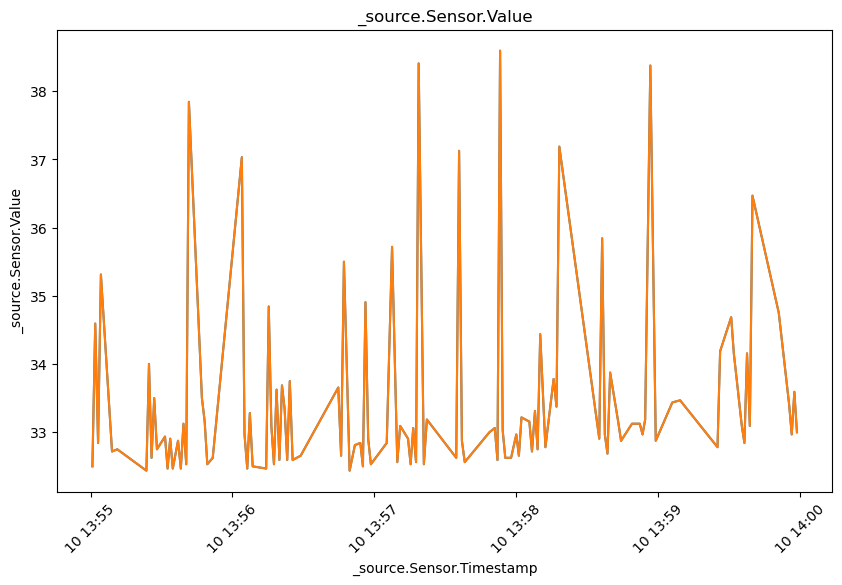

In [83]:
import matplotlib.dates as mdates

def simple_plot(df, x_axis, y_axis):
    """
    Plots a simple graph
    """
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed
    ax.plot(df[x_axis], df[y_axis])
    
    # Format the x-axis to show fewer ticks
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjust tick frequency
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))  # Format the date
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)


    plt.plot(df[x_axis], df[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{y_axis}')
    plt.show()


# prepare the dataframe
temp_df = prepare_df(temp_df, cols_to_keep=['_source.Sensor.Timestamp',
                                             '_source.Sensor.PhysicalContext',
                                             '_source.Sensor.Index',
                                             '_source.Sensor.Value',
                                             '_source.Sensor.LocationDetail.XName'])

# testing filtered dataframe
filtered1_df = temp_df[temp_df['_source.Sensor.PhysicalContext'] == 'CPU']
#display(fitered1_df.head(5))
filtered2_df = filtered1_df[filtered1_df['_source.Sensor.Index'] == 0]
#display(filtered2_df.head(5))

simple_plot(filtered2_df, '_source.Sensor.Timestamp', '_source.Sensor.Value')


In [84]:

def multiplot_column_comparison(df, x_axis, y_axis, comparison, show=True):
    """
    Plots a simple graph representing on different colors the different instances in the comparison
    
    show: if True show the plot, else return the figure and axis
    """

    # Get the unique values of the comparison column
    unique_values = df[comparison].unique()

    # read the physical context
    phys_contexts = df['_source.Sensor.PhysicalContext'].unique()

    # Create a color map
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

    # Extract the last part of the column names for cleaner labels
    x_axis_label = x_axis.split('.')[-1]
    y_axis_label = y_axis.split('.')[-1]
    comparison_label = comparison.split('.')[-1]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size if needed

    # Plot each unique value with a different color
    for i, value in enumerate(unique_values):
        # DEBUG: Print the min and max timestamp
        #print(f'{value}: {df[df[comparison] == value][x_axis].min()} - {df[df[comparison] == value][x_axis].max()}')

        subset = df[df[comparison] == value]
        ax.plot(subset[x_axis], subset[y_axis], label=f"Index {value}", color=colors[i])

    # Format the x-axis to show fewer ticks
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjust tick frequency

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add labels and title
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel(y_axis_label)
    if len(phys_contexts) > 1:
        ax.set_title(f'{y_axis_label} comparison by {comparison_label}')
    else:
        ax.set_title(f'{phys_contexts[0]}: {y_axis_label} comparison by {comparison_label} ')
    ax.legend()

    # if show is True, display the plot
    if show:
        plt.show()
    else:
        return fig, ax


# do a multiplot of the column physical context
gpu_df = temp_df[temp_df['_source.Sensor.PhysicalContext'] == 'GPU']
#multiplot_column_comparison(gpu_df, '_source.Sensor.Timestamp', '_source.Sensor.Value', '_source.Sensor.Index')


In [85]:
import matplotlib.pyplot as plt
import math

def plot_all_physical_contexts(df, metric, x_axis, y_axis, comparison):
    """
    Recognizes all unique physicalContext values and generates a grid of plots using 
    multiplot_column_comparison for each physicalContext, arranged in a grid.
    
    :param df: DataFrame containing the data
    :param x_axis: Column name for the x-axis
    :param y_axis: Column name for the y-axis
    :param comparison: Column name to group by for the comparison
    """
    # Get all unique physicalContext values
    physical_contexts = df['_source.Sensor.PhysicalContext'].unique()
    num_contexts = len(physical_contexts)

    # Calculate the number of rows needed for 2 columns
    num_cols = 2
    num_rows = math.ceil(num_contexts / num_cols)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Loop through each physicalContext and generate a plot
    for i, physical_context in enumerate(physical_contexts):
        ax = axes[i]
        #print(f"Plotting for PhysicalContext: {physical_context}")

        # Extract the last part of the column names for cleaner labels
        x_axis_label = x_axis.split('.')[-1]
        y_axis_label = y_axis.split('.')[-1]
        comparison_label = comparison.split('.')[-1]
        
        # Filter the DataFrame for the current physicalContext
        filtered_df = df[df['_source.Sensor.PhysicalContext'] == physical_context]
        
        # Call the multiplot_column_comparison function
        individual_fig, individual_ax = multiplot_column_comparison(filtered_df, x_axis, y_axis, comparison, False)

        # Replot the content from individual_ax onto ax
        for line in individual_ax.lines:
            ax.plot(line.get_xdata(), line.get_ydata(), label=line.get_label())
        ax.set_title(f'{physical_context}: {y_axis_label} comparison by {comparison_label}')
        ax.set_xlabel(individual_ax.get_xlabel())
        ax.set_ylabel(individual_ax.get_ylabel())
        ax.legend()
        ax.grid(True)

        # Close the individual figure to free resources
        plt.close(individual_fig)

    # Hide any unused subplots
    for j in range(len(physical_contexts), len(axes)):
        fig.delaxes(axes[j])

    # Add a main title for the entire figure
    fig.suptitle(f"{metric} Plots by Physical Context", fontsize=16)
    plt.show()

#plot_all_physical_contexts(temp_df, "Temperature", '_source.Sensor.Timestamp', '_source.Sensor.Value', '_source.Sensor.Index')

In [86]:
import matplotlib.dates as mdates

def plot_comparisons_grid(df, x_axis, y_axis, comparison, grid_shape=None):
    """
    Plots separate graphs for each unique value in the comparison column, arranged in a grid layout.
    
    :param df: DataFrame containing the data to plot
    :param x_axis: Column name for the x-axis
    :param y_axis: Column name for the y-axis
    :param comparison: Column name to group by for separate plots
    :param grid_shape: Tuple specifying the grid shape (rows, cols). If None, it will be auto-calculated.
    """
    # Get unique values for the comparison column
    unique_values = df[comparison].unique()
    num_plots = len(unique_values)
    
    # Determine grid shape if not provided
    if grid_shape is None:
        cols = int(np.ceil(np.sqrt(num_plots)))  # Number of columns
        rows = int(np.ceil(num_plots / cols))   # Number of rows
    else:
        rows, cols = grid_shape

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10), constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    # Plot each unique value in its own subplot
    for i, value in enumerate(unique_values):
        ax = axes[i]
        subset = df[df[comparison] == value]
        
        # Plot the data
        ax.plot(subset[x_axis], subset[y_axis], label=f'{comparison}: {value}')
        
        # Format the x-axis
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        ax.tick_params(axis='x', rotation=45)
        
        # Add labels and title
        ax.set_title(f'{comparison}: {value}')
        ax.set_xlabel(x_axis)
        ax.set_ylabel(y_axis)
        ax.legend()

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Show the plot
    plt.show()

# filter the gpu data
gpu_df = temp_df[temp_df['_source.Sensor.PhysicalContext'] == 'GPU']

#display(gpu_df.head(10))

# Example usage
#plot_comparisons_grid(gpu_df, '_source.Sensor.Timestamp', '_source.Sensor.Value', '_source.Sensor.Index')

In [87]:
# get the min and max of the timestamp when dividing the data in physical contexts and indexes
def get_min_max_timestamp(df, physical_context, index):
    """
    Returns the min and max timestamp of a specific physical context
    """

    # copy the df
    df = df.copy()

    # Sort the DataFrame by timestamp
    df = df.sort_values(by='_source.Sensor.Timestamp')

    # filter the DataFrame by physical context
    filtered_df = df[df['_source.Sensor.PhysicalContext'] == physical_context][df['_source.Sensor.Index'] == index]
    
    # get the min and max timestamp
    min_timestamp = filtered_df['_source.Sensor.Timestamp'].min()
    max_timestamp = filtered_df['_source.Sensor.Timestamp'].max()

    print()

    return min_timestamp, max_timestamp


def plot_timestamp_increments(df, physical_context, index=None):
    """
    Plots the increments of the timestamp for a specific physical context and index
    """

    # Ensure the timestamp column is in datetime format
    df['_source.Sensor.Timestamp'] = pd.to_datetime(df['_source.Sensor.Timestamp'], errors='coerce')

    # Sort the DataFrame by timestamp
    df = df.sort_values(by='_source.Sensor.Timestamp')

    # filter the DataFrame by physical context
    if index == None:
        filtered_df = df[df['_source.Sensor.PhysicalContext'] == physical_context]
    else:
        filtered_df = df[df['_source.Sensor.PhysicalContext'] == physical_context][df['_source.Sensor.Index'] == index]
    
    # get the increments of the timestamp
    increments = filtered_df['_source.Sensor.Timestamp'].diff().dt.total_seconds()

    # plot the increments
    plt.plot(filtered_df['_source.Sensor.Timestamp'], increments)
    plt.xlabel('_source.Sensor.Timestamp')
    plt.ylabel('Increment (s)')
    plt.title(f'Increments of {physical_context} Index {index}')
    plt.show()

# for index in range(0, 4):
#     min_timestamp, max_timestamp = get_min_max_timestamp(temp_df, 'CPU', index)
#     print(f'Index {index}: Min timestamp: {min_timestamp}, Max timestamp: {max_timestamp}')
#     plot_timestamp_increments(temp_df, 'CPU', index)

#plot_timestamp_increments(temp_df, )

## Here some cleaned code using the functions

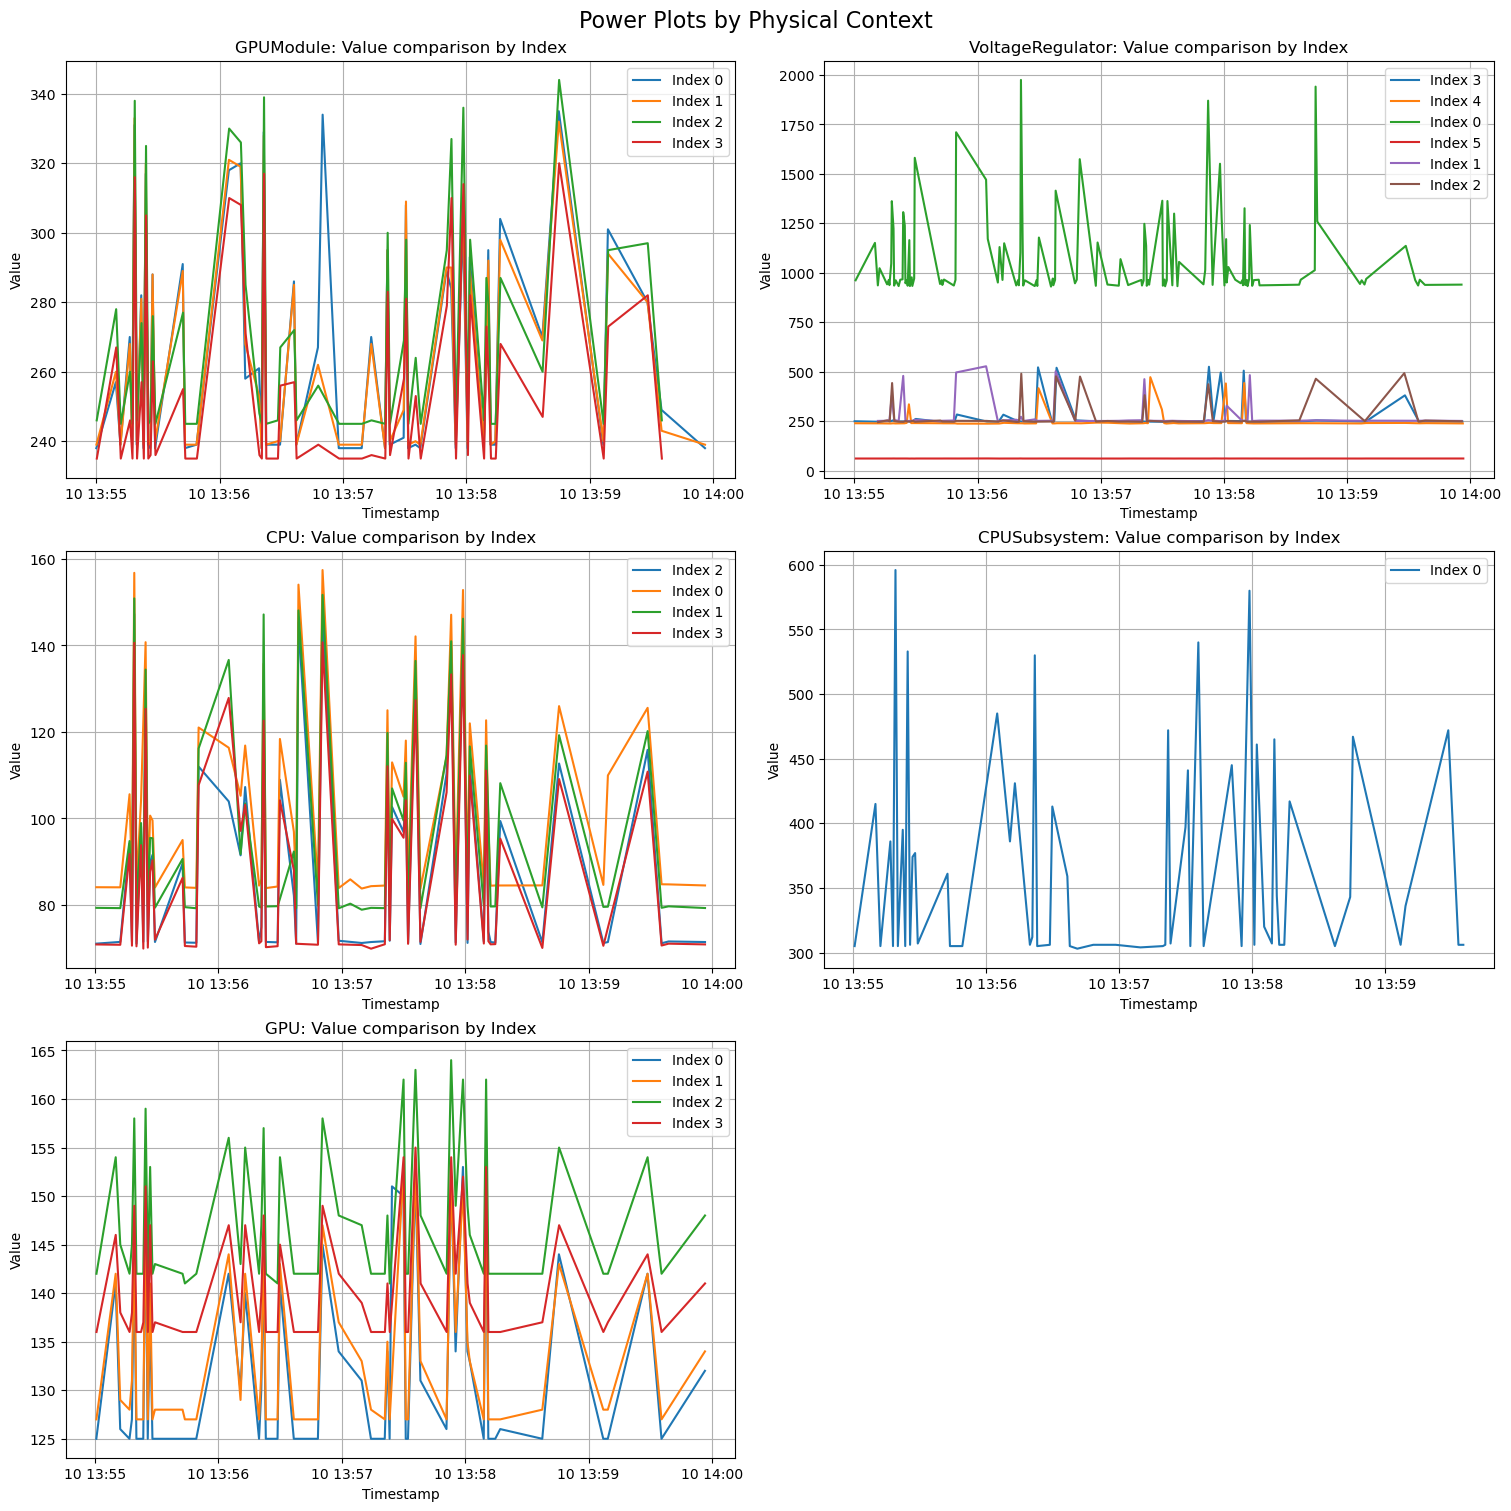

In [88]:
# read the data
power_df = pd.read_csv('data_power_cscs.csv')

# display the columns
power_df.columns

# prepare data and select the columns we want to keep
cols_to_keep = ['_source.Sensor.Timestamp',
             '_source.Sensor.PhysicalContext',
             '_source.Sensor.Index',
             '_source.Sensor.Value',
             '_source.Sensor.LocationDetail.XName']
power_df = prepare_df(power_df, cols_to_keep)

# plot the time increments with the power data using the function
#plot_timestamp_increments(power_df, 'CPU', 0)

# plot the data for all the physical contexts
plot_all_physical_contexts(power_df, "Power", '_source.Sensor.Timestamp', '_source.Sensor.Value', '_source.Sensor.Index')